# Classification with ANN

Avila Data Set can be found in: https://archive.ics.uci.edu/ml/datasets/Avila

Abstract: The Avila data set has been extracted from 800 images of the 'Avila Bible', an XII century giant Latin copy of the Bible. The prediction task consists in associating each pattern to a copyist.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
%matplotlib inline

In [10]:
dataset = pd.read_csv('/data/avila-tr.csv')
dataset.head()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing,Class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


Text(0.5, 1.0, 'Amount of instances per class')

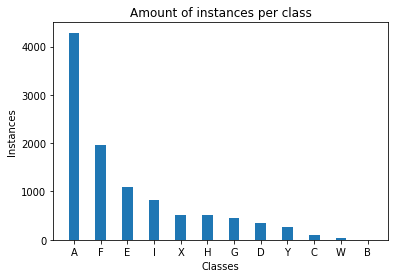

In [11]:
#Data preprocessing

name = ['A','F', 'E', 'I', 'X', 'H', 'G', 'D', 'Y','C', 'W', 'B']
plt.bar(name, dataset['Class'].value_counts(), width=0.4, align='center')
plt.ylabel('Instances')
plt.xlabel('Classes')
plt.title('Amount of instances per class')

In [12]:
#Making a sampling and saving in another csv
my_filter2 = dataset['Class'] == 'A'
data3 = dataset[my_filter2]
data3 = shuffle(data3)
data3 = data3.sample(500)

my_filter2 = dataset['Class'] == 'F'
data4 = dataset[my_filter2]
data4 = shuffle(data4)
data4 = data4.sample(500)

my_filter2 = dataset['Class'] == 'E'
data5 = dataset[my_filter2]
data5 = shuffle(data5)
data5 = data5.sample(500)

my_filter2 = dataset['Class'] == 'I'
data6 = dataset[my_filter2]
data6 = shuffle(data6)
data6 = data6.sample(500)

my_filter2 = dataset['Class'] == 'X'
data7 = dataset[my_filter2]
data7 = shuffle(data7)
data7 = data7.sample(500)

my_filter2 = dataset['Class'] == 'H'
data8 = dataset[my_filter2]
data8 = shuffle(data8)
data8 = data8.sample(500)

my_filter2 = dataset['Class'] == 'G'
data9 = dataset[my_filter2]

my_filter2 = dataset['Class'] == 'D'
data10 = dataset[my_filter2]

my_filter2 = dataset['Class'] == 'Y'
data11 = dataset[my_filter2]

my_filter2 = dataset['Class'] == 'C'
data12 = dataset[my_filter2]

my_filter2 = dataset['Class'] == 'W'
data13 = dataset[my_filter2]

my_filter2 = dataset['Class'] == 'B'
data14 = dataset[my_filter2]

final = pd.concat([data3, data4, data5, data6, data7, data8,data9, data10,data11, data12, data13, data14], ignore_index = True, axis = 0)

final.to_csv('final.csv')

In [14]:
#Creating data
final = pd.read_csv('/data/final.csv')
X = final.iloc[:, 1:-1].values
y = final.iloc[:, 11].values

d = {'G':500, 'D':500,'Y':500, 'C':500, 'W':500, 'B':500}

from imblearn.over_sampling import SMOTE
X_res, y_res = SMOTE(ratio=d, k_neighbors=4).fit_sample(X, y)

In [16]:
#Now every class have the same amount of instances
from collections import Counter
print('Original dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({'A': 500, 'F': 500, 'E': 500, 'I': 500, 'X': 500, 'H': 500, 'G': 500, 'D': 500, 'Y': 500, 'C': 500, 'W': 500, 'B': 500})


In [17]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 0)

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_val = keras.utils.to_categorical(y_val)


classifier = Sequential()

classifier.add(Dense(units = 11, kernel_initializer = 'uniform', activation = 'tanh', input_dim = 10))


classifier.add(Dense(units= 11, kernel_initializer = 'uniform', activation = 'tanh'))

classifier.add(Dense(units= 11, kernel_initializer = 'uniform', activation = 'tanh'))

classifier.add(Dense(units= 12, kernel_initializer = 'uniform', activation = 'softmax'))


classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_acc', min_delta=0, patience=8, mode='auto') 
classifier.fit(X_train, y_train, nb_epoch = 300, validation_data=(X_val, y_val),callbacks=[early_stopping])

/home/nilbson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 3372 samples, validate on 844 samples
Epoch 1/300
3372/3372 [==============================] - 0s 113us/step - loss: 2.4174 - accuracy: 0.1329 - val_loss: 2.3025 - val_accuracy: 0.1197
Epoch 2/300
3372/3372 [==============================] - 0s 28us/step - loss: 2.2802 - accuracy: 0.1260 - val_loss: 2.2587 - val_accuracy: 0.1303
Epoch 3/300
3372/3372 [==============================] - 0s 29us/step - loss: 2.2203 - accuracy: 0.1572 - val_loss: 2.1708 - val_accuracy: 0.1777
Epoch 4/300
  32/3372 [..............................] - ETA: 0s - loss: 2.1821 - accuracy: 0.1875

/home/nilbson/.local/lib/python3.7/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


3372/3372 [==============================] - 0s 27us/step - loss: 2.0752 - accuracy: 0.2198 - val_loss: 1.9828 - val_accuracy: 0.2393
Epoch 5/300
3372/3372 [==============================] - 0s 27us/step - loss: 1.9478 - accuracy: 0.2372 - val_loss: 1.8997 - val_accuracy: 0.2464
Epoch 6/300
3372/3372 [==============================] - 0s 26us/step - loss: 1.8988 - accuracy: 0.2497 - val_loss: 1.8674 - val_accuracy: 0.2346
Epoch 7/300
3372/3372 [==============================] - 0s 26us/step - loss: 1.8768 - accuracy: 0.2476 - val_loss: 1.8485 - val_accuracy: 0.2524
Epoch 8/300
3372/3372 [==============================] - 0s 26us/step - loss: 1.8604 - accuracy: 0.2630 - val_loss: 1.8312 - val_accuracy: 0.2654
Epoch 9/300
3372/3372 [==============================] - 0s 28us/step - loss: 1.8415 - accuracy: 0.2811 - val_loss: 1.8070 - val_accuracy: 0.3116
Epoch 10/300
3372/3372 [==============================] - 0s 28us/step - loss: 1.8159 - accuracy: 0.3215 - val_loss: 1.7889 - val_accura

Epoch 60/300
3372/3372 [==============================] - 0s 26us/step - loss: 1.1162 - accuracy: 0.6077 - val_loss: 1.1794 - val_accuracy: 0.5877
Epoch 61/300
3372/3372 [==============================] - 0s 26us/step - loss: 1.1111 - accuracy: 0.6121 - val_loss: 1.1730 - val_accuracy: 0.5912
Epoch 62/300
3372/3372 [==============================] - 0s 26us/step - loss: 1.1014 - accuracy: 0.6139 - val_loss: 1.1677 - val_accuracy: 0.5948
Epoch 63/300
3372/3372 [==============================] - 0s 30us/step - loss: 1.0946 - accuracy: 0.6168 - val_loss: 1.1581 - val_accuracy: 0.6019
Epoch 64/300
3372/3372 [==============================] - 0s 26us/step - loss: 1.0877 - accuracy: 0.6177 - val_loss: 1.1512 - val_accuracy: 0.6102
Epoch 65/300
3372/3372 [==============================] - 0s 26us/step - loss: 1.0802 - accuracy: 0.6180 - val_loss: 1.1490 - val_accuracy: 0.6066
Epoch 66/300
3372/3372 [==============================] - 0s 27us/step - loss: 1.0743 - accuracy: 0.6183 - val_loss: 1

3372/3372 [==============================] - 0s 26us/step - loss: 0.8772 - accuracy: 0.6821 - val_loss: 0.9856 - val_accuracy: 0.6481
Epoch 116/300
3372/3372 [==============================] - 0s 26us/step - loss: 0.8776 - accuracy: 0.6809 - val_loss: 0.9900 - val_accuracy: 0.6410
Epoch 117/300
3372/3372 [==============================] - 0s 26us/step - loss: 0.8722 - accuracy: 0.6853 - val_loss: 0.9659 - val_accuracy: 0.6528
Epoch 118/300
3372/3372 [==============================] - 0s 27us/step - loss: 0.8691 - accuracy: 0.6800 - val_loss: 0.9715 - val_accuracy: 0.6540
Epoch 119/300
3372/3372 [==============================] - 0s 26us/step - loss: 0.8668 - accuracy: 0.6874 - val_loss: 0.9696 - val_accuracy: 0.6576
Epoch 120/300
3372/3372 [==============================] - 0s 26us/step - loss: 0.8656 - accuracy: 0.6874 - val_loss: 0.9684 - val_accuracy: 0.6552
Epoch 121/300
3372/3372 [==============================] - 0s 26us/step - loss: 0.8628 - accuracy: 0.6922 - val_loss: 0.9615 -

3372/3372 [==============================] - 0s 27us/step - loss: 0.7822 - accuracy: 0.7215 - val_loss: 0.8992 - val_accuracy: 0.6765
Epoch 171/300
3372/3372 [==============================] - 0s 27us/step - loss: 0.7783 - accuracy: 0.7224 - val_loss: 0.9104 - val_accuracy: 0.6694
Epoch 172/300
3372/3372 [==============================] - 0s 26us/step - loss: 0.7786 - accuracy: 0.7292 - val_loss: 0.8921 - val_accuracy: 0.6694
Epoch 173/300
3372/3372 [==============================] - 0s 26us/step - loss: 0.7770 - accuracy: 0.7245 - val_loss: 0.8898 - val_accuracy: 0.6718
Epoch 174/300
3372/3372 [==============================] - 0s 28us/step - loss: 0.7770 - accuracy: 0.7209 - val_loss: 0.8997 - val_accuracy: 0.6765
Epoch 175/300
3372/3372 [==============================] - 0s 26us/step - loss: 0.7743 - accuracy: 0.7236 - val_loss: 0.9017 - val_accuracy: 0.6789
Epoch 176/300
3372/3372 [==============================] - 0s 26us/step - loss: 0.7758 - accuracy: 0.7230 - val_loss: 0.8877 -

3372/3372 [==============================] - 0s 25us/step - loss: 0.7279 - accuracy: 0.7367 - val_loss: 0.8510 - val_accuracy: 0.6789
Epoch 226/300
3372/3372 [==============================] - 0s 27us/step - loss: 0.7276 - accuracy: 0.7372 - val_loss: 0.8508 - val_accuracy: 0.6801
Epoch 227/300
3372/3372 [==============================] - 0s 26us/step - loss: 0.7257 - accuracy: 0.7414 - val_loss: 0.8586 - val_accuracy: 0.6836
Epoch 228/300
3372/3372 [==============================] - 0s 26us/step - loss: 0.7248 - accuracy: 0.7390 - val_loss: 0.8697 - val_accuracy: 0.6836
Epoch 229/300
3372/3372 [==============================] - 0s 27us/step - loss: 0.7279 - accuracy: 0.7375 - val_loss: 0.8547 - val_accuracy: 0.6860
Epoch 230/300
3372/3372 [==============================] - 0s 26us/step - loss: 0.7256 - accuracy: 0.7381 - val_loss: 0.8496 - val_accuracy: 0.6931
Epoch 231/300
3372/3372 [==============================] - 0s 27us/step - loss: 0.7261 - accuracy: 0.7337 - val_loss: 0.8559 -

3372/3372 [==============================] - 0s 26us/step - loss: 0.6853 - accuracy: 0.7491 - val_loss: 0.8167 - val_accuracy: 0.7062
Epoch 281/300
3372/3372 [==============================] - 0s 26us/step - loss: 0.6860 - accuracy: 0.7500 - val_loss: 0.8167 - val_accuracy: 0.7038
Epoch 282/300
3372/3372 [==============================] - 0s 27us/step - loss: 0.6841 - accuracy: 0.7479 - val_loss: 0.8196 - val_accuracy: 0.7062
Epoch 283/300
3372/3372 [==============================] - 0s 26us/step - loss: 0.6864 - accuracy: 0.7494 - val_loss: 0.8162 - val_accuracy: 0.6931
Epoch 284/300
3372/3372 [==============================] - 0s 26us/step - loss: 0.6850 - accuracy: 0.7429 - val_loss: 0.8165 - val_accuracy: 0.7038
Epoch 285/300
3372/3372 [==============================] - 0s 27us/step - loss: 0.6821 - accuracy: 0.7506 - val_loss: 0.8246 - val_accuracy: 0.6967
Epoch 286/300
3372/3372 [==============================] - 0s 28us/step - loss: 0.6814 - accuracy: 0.7473 - val_loss: 0.8193 -

In [18]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

scores = classifier.evaluate(X_test, y_test)
print("%s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.argmax(axis = 1), y_pred.argmax(axis = 1))

844/844 [==============================] - 0s 8us/step
accuracy: 70.50%


# I believe the low accuracy is due to the fact that the technique of generating new instances cannot provide data to mimic the real world data in this case.